<a href="https://colab.research.google.com/github/Keyrama/Machine-Learning/blob/main/Keras_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.88333, random_state=42)

print(f'Training set: {x_train.shape}, {y_train.shape}')
print(f'Validation set: {x_valid.shape}, {y_valid.shape}')
print(f'Test set: {x_test.shape}, {y_test.shape}')

Training set: (7000, 28, 28), (7000,)
Validation set: (53000, 28, 28), (53000,)
Test set: (10000, 28, 28), (10000,)


In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28)),  # Define input shape here
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10,
                                          validation_data=(x_valid, y_valid))


Epoch 1/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.4684 - loss: 1.5388 - val_accuracy: 0.8896 - val_loss: 0.3794
Epoch 2/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8410 - loss: 0.4997 - val_accuracy: 0.9051 - val_loss: 0.3259
Epoch 3/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9004 - loss: 0.3469 - val_accuracy: 0.9269 - val_loss: 0.2532
Epoch 4/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9212 - loss: 0.2803 - val_accuracy: 0.9285 - val_loss: 0.2511
Epoch 5/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9377 - loss: 0.2414 - val_accuracy: 0.9333 - val_loss: 0.2371
Epoch 6/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9403 - loss: 0.1976 - val_accuracy: 0.9389 - val_loss: 0.2200
Epoch 7/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9570 - loss: 0.1570 - val_accuracy: 0.9380 - val_loss: 0.2226
Epoch 8/10
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9564 - loss: 0.1494 - val_ac

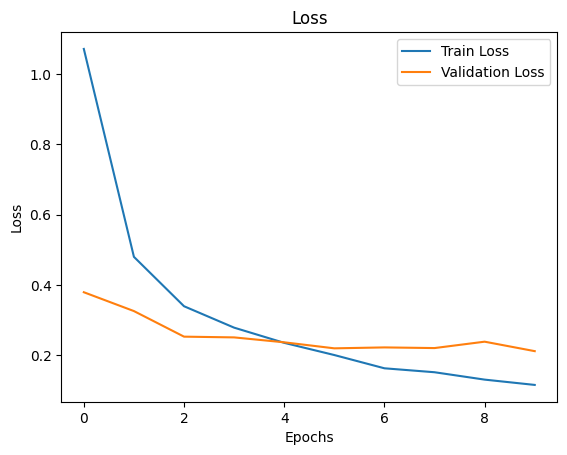

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [16]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9480 - loss: 0.1962


[0.19618715345859528, 0.9480000138282776]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


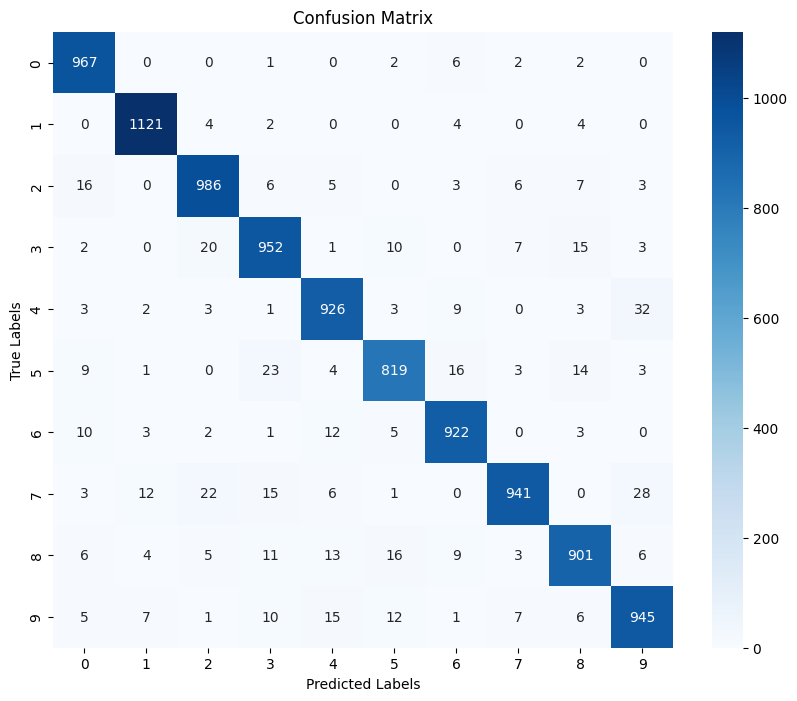

In [17]:
# prompt: how to get predictions from my model and draw a confusion matrix?

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions
y_pred_probs = model.predict(x_test)
y_pred = y_pred_probs.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
